### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
#from stable_baselines.common.policies import MlpPolicy
from stable_baselines3 import PPO
from matplotlib import pyplot as plt

In [2]:
# Import classes
from rl_environment import Environment

### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 2
max_inventory_amount_regional_warehouses = 30
max_inventory_amount_central_warehouse = 40
customer_demand_per_step = [1,2]  # List needs one entry per regional warehouse 
simulation_length = 30
lead_time = 2
shipment_amount = 5
with_manufacturer = False
cw_shipment_amount = 10
manufacturer_prod_capacity_per_step = 10

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount,
                  manufacturer = with_manufacturer,
                  cw_shipment_amount = cw_shipment_amount,
                  mf_prod_capacity = manufacturer_prod_capacity_per_step)

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 13
regional_warehouse_1 ; ID: 1 ; Inventory: 10 ; Demand: 1 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 10 ; Demand: 2 ; Lost sales: 0
________________________________________________________________________________
Environment Information
-----------------------
Observation space: Dict(cw_inventory:Discrete(41), rw_inventories:MultiDiscrete([31 31]))
Action space: MultiDiscrete([2 2])
Starting state: {'rw_inventories': array([10, 10]), 'cw_inventory': 13}
________________________________________________________________________________


### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = PPO("MultiInputPolicy", env, verbose=1)
ppo_model.learn(total_timesteps=50000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | 1.84     |
| time/              |          |
|    fps             | 1071     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 2.09        |
| time/                   |             |
|    fps                  | 787         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009033456 |
|    clip_fraction        | 0.0551      |
|    clip_range           | 0.2         |
|    entropy_loss   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 5.04         |
| time/                   |              |
|    fps                  | 515          |
|    iterations           | 11           |
|    time_elapsed         | 43           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0066857412 |
|    clip_fraction        | 0.0658       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.866       |
|    explained_variance   | 0.317        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.617        |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.0098      |
|    value_loss           | 1.12         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 7.36         |
| time/                   |              |
|    fps                  | 526          |
|    iterations           | 21           |
|    time_elapsed         | 81           |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0052052345 |
|    clip_fraction        | 0.0615       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.475       |
|    explained_variance   | 0.285        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.11         |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.00752     |
|    value_loss           | 2.28         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

###### Learning Curve

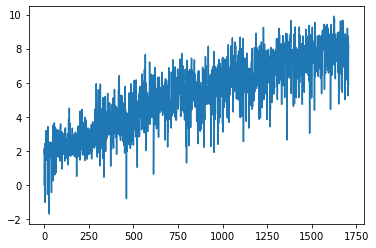

In [6]:
plt.plot(env.total_reward)
plt.show()

### Run simulation

In [7]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = {}
for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = []
    
cw_inventory_level = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["RW Invs:"]:
        inventory_levels[i].append(inv)
        i += 1
    cw_inventory_level.append(info["CW Inv:"])
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 29 | RW Invs: [9, 8] | CW Inv: 13 | Action: [0 0] | Reward: 0.11 | 
Steps left: 28 | RW Invs: [8, 6] | CW Inv: 13 | Action: [0 0] | Reward: 0.13 | 
Steps left: 27 | RW Invs: [7, 4] | CW Inv: 13 | Action: [0 0] | Reward: 0.16 | 
Steps left: 26 | RW Invs: [6, 2] | CW Inv: 13 | Action: [0 1] | Reward: 0.24 | 
Steps left: 25 | RW Invs: [5, 0] | CW Inv: 13 | Action: [0 1] | Reward: 0.58 | 
Steps left: 24 | RW Invs: [4, 3] | CW Inv: 13 | Action: [0 1] | Reward: 0.22 | 
Steps left: 23 | RW Invs: [3, 6] | CW Inv: 13 | Action: [0 0] | Reward: 0.2 | 
Steps left: 22 | RW Invs: [2, 9] | CW Inv: 13 | Action: [0 0] | Reward: 0.22 | 
Steps left: 21 | RW Invs: [1, 7] | CW Inv: 13 | Action: [1 0] | Reward: 0.31 | 
Steps left: 20 | RW Invs: [0, 5] | CW Inv: 13 | Action: [1 0] | Reward: 0.58 | 
Steps left: 19 | RW Invs: [4, 3] | CW Inv: 13 | Action: [0 1] | Reward: 0.22 | 
Steps left: 18 | RW Invs: [8, 1] | CW Inv: 13 | Action: [0 0] | Reward: 0.31 | 
Steps left: 17 | RW Invs: [7, 4] | CW Inv

###### Inventory level graph

Regional warehouse 1


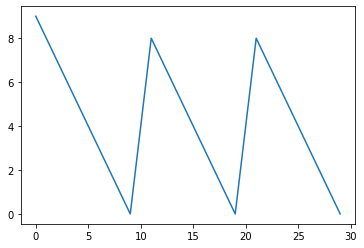

Regional warehouse 2


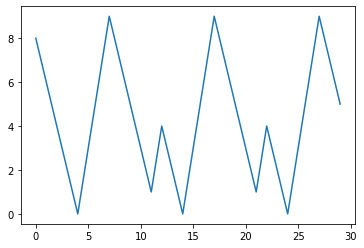

In [8]:
for rw_id in inventory_levels:
    print("Regional warehouse", rw_id)
    plt.plot(inventory_levels[rw_id])
    plt.show()

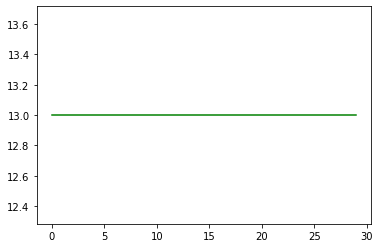

In [9]:
plt.plot(cw_inventory_level, color="green")
plt.show()